CSC 529 Project 2: Lan Nguyen


In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

Upload Eagle.jpg and Eagle2.jpg here:

In [175]:
from google.colab import files

uploaded = files.upload()

Saving Eagle2.jpg to Eagle2.jpg


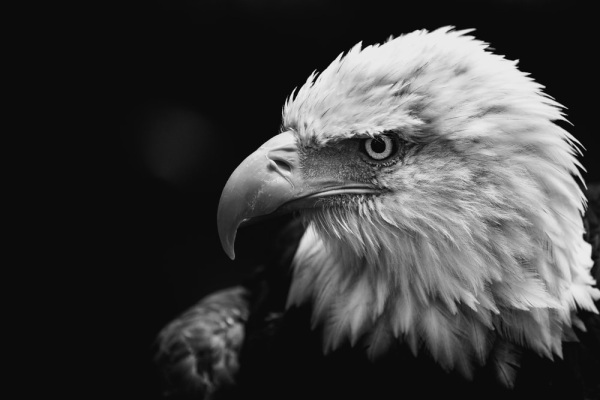

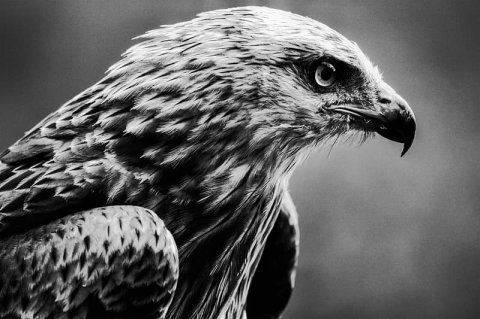

In [229]:
img = cv2.imread('Eagle.jpg')
img2= cv2.imread('Eagle2.jpg')

def rescale_img(img):
  scale_percent = 60 
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
# resize image
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = rescale_img(img)
img2= rescale_img(img2)

cv2_imshow(img)
cv2_imshow(img2)

My function for thresholding the input image:

In [ ]:
def my_threshold(img):
    img_contrast = np.zeros(img.shape, img.dtype)
    alpha = 1.5 # Simple contrast control
    beta = 15    # Simple brightness control

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            img_contrast[y,x] = np.clip(alpha*img[y,x] + beta, 0, 255)

    blur = cv2.GaussianBlur(img_contrast,(3,3),0)

    img_threshold = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    kernel = np.ones((2,2),np.uint8)
    img_closing = cv2.morphologyEx(img_threshold, cv2.MORPH_CLOSE, kernel, iterations = 2)

    kernel2 = np.ones((2,2),np.uint8)
    img_erosion = cv2.erode(img_closing,kernel2,iterations = 1)

    edges = cv2.Canny(img_erosion,30,120)

    final_img = edges | img_erosion

    return final_img


Run this cell for general results:

First picture: 


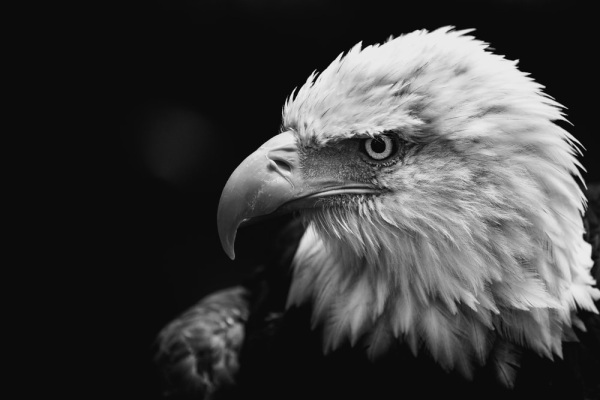

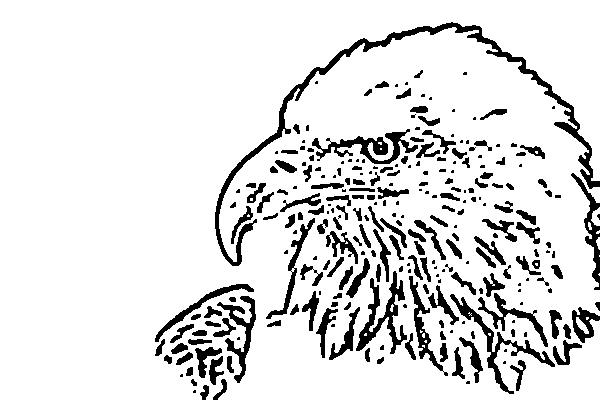

Sencond picture: 


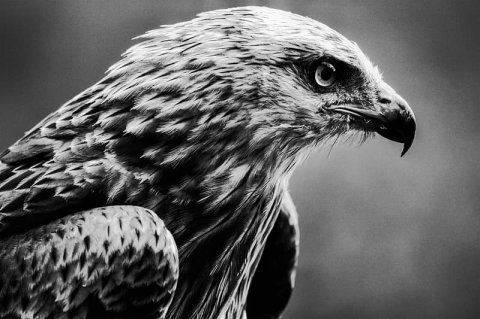

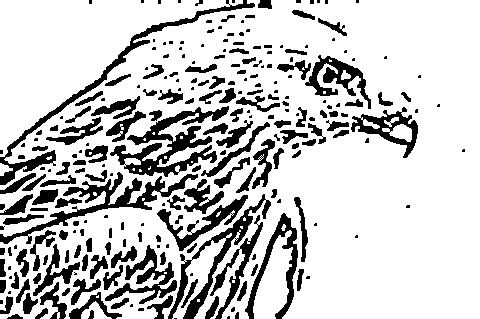

In [231]:
result1 = my_threshold(img)
result2 = my_threshold(img2)

print("First picture: ")

cv2_imshow(img)
cv2_imshow(result1)

print("Sencond picture: ")

cv2_imshow(img2)
cv2_imshow(result2)


To see what steps I did in my function, run these cells one by one:

After adjust contrast: 


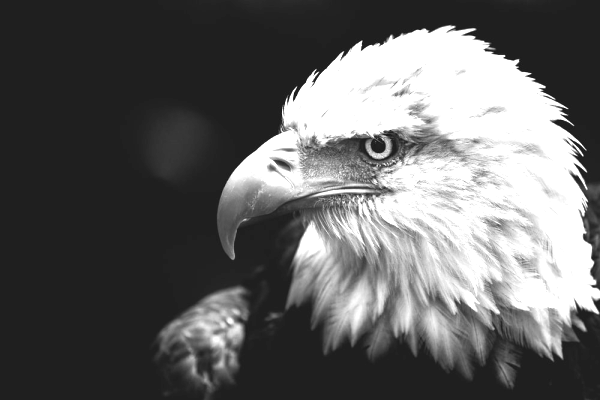

After apply 3x3 filter: 


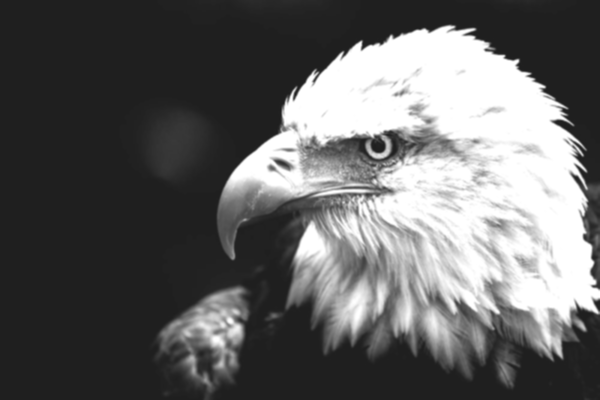

After apply adaptive threshold: 


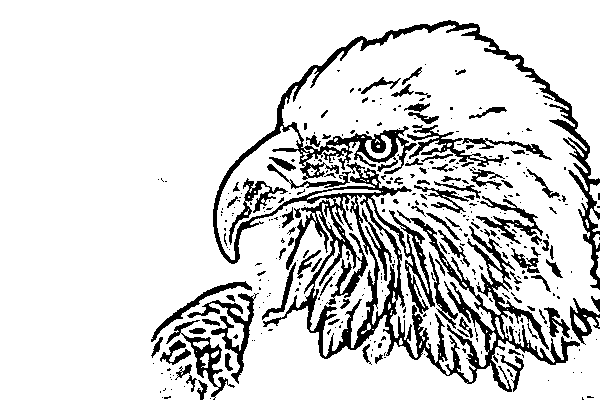

In [232]:
img_contrast = np.zeros(img.shape, img.dtype)
alpha = 1.5 # Simple contrast control
beta = 15    # Simple brightness control

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        img_contrast[y,x] = np.clip(alpha*img[y,x] + beta, 0, 255)

print("After adjust contrast: ")

cv2_imshow(img_contrast) 

print("After apply 3x3 filter: ")

blur = cv2.GaussianBlur(img_contrast,(3,3),0)
cv2_imshow(blur)


print("After apply adaptive threshold: ")

img_threshold = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

cv2_imshow(img_threshold)





A series of morphological processes were applied inorder to remove outliner pixel:

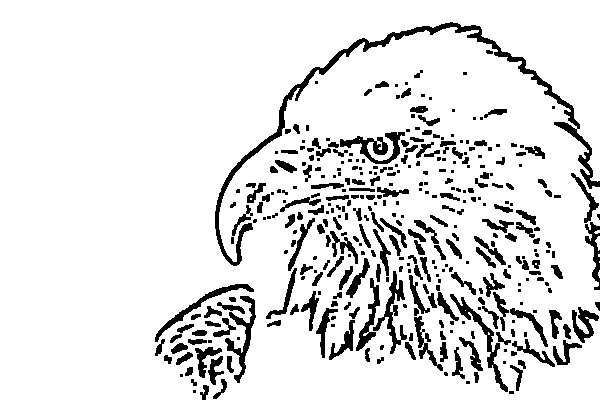

In [200]:
kernel3 = np.ones((2,2),np.uint8)
img_closing = cv2.morphologyEx(img_threshold, cv2.MORPH_CLOSE, kernel3, iterations = 2)

cv2_imshow(img_closing)


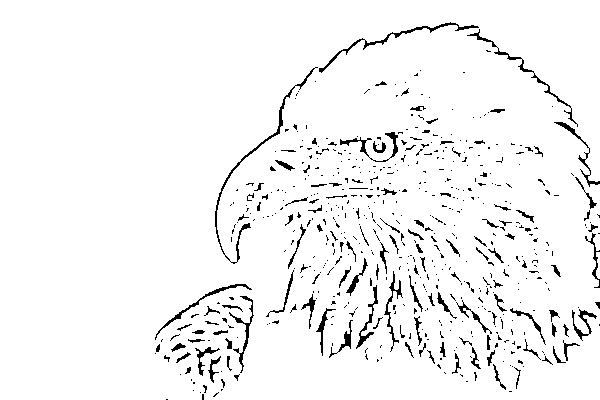

In [195]:
kernel2 = np.ones((3,3),np.uint8)

img_dilation = cv2.dilate(img_closing,kernel2,iterations = 1)

cv2_imshow(img_dilation)

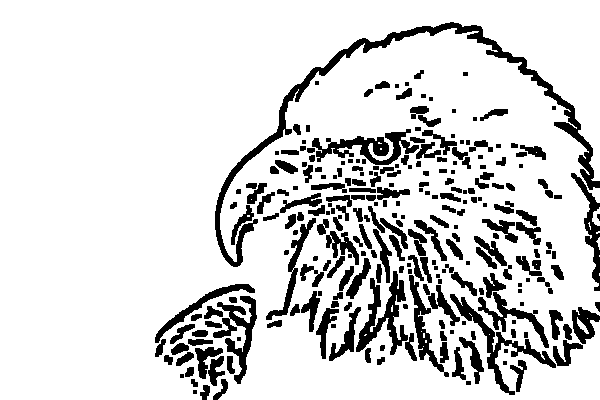

In [201]:
kernel = np.ones((2,2),np.uint8)
img_erosion = cv2.erode(img_closing,kernel,iterations = 1)

cv2_imshow(img_erosion)

Apply edge detection for the above result:

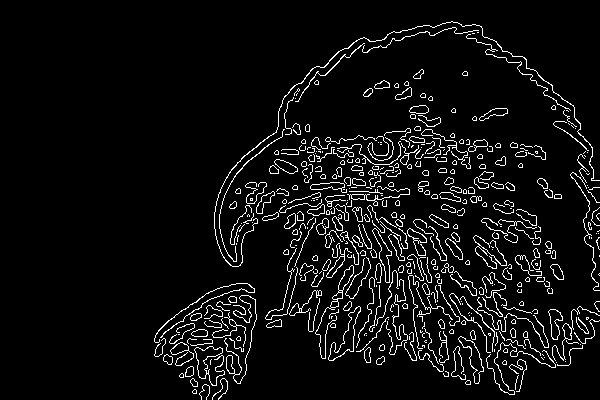

In [214]:
edges = cv2.Canny(img_erosion,30,120)

cv2_imshow(edges)

Combine edge detection result vs image after being processed:

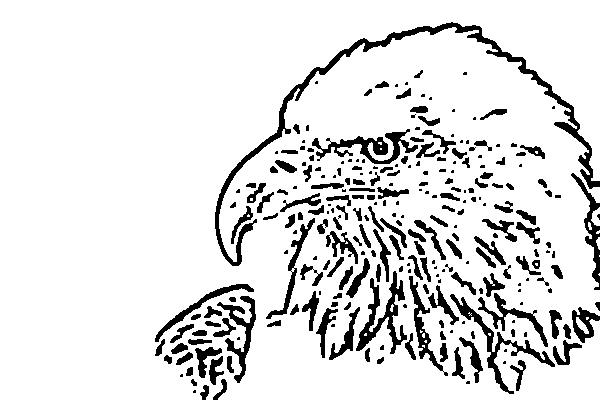

In [215]:
final_img = edges | img_erosion

cv2_imshow(final_img)
